In [120]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
import string
import re
from sklearn.feature_extraction.text import CountVectorizer

In [121]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [122]:
train=pd.read_csv('twittertrain.csv')
test=pd.read_csv('twittertest.csv')

In [123]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [124]:
print(train.shape)
test.shape

(7613, 5)


(3263, 4)

In [125]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [126]:
train=train.drop(columns=['id','keyword','location'])
train
         

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [127]:
train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [128]:
feat=train[['text']]
label=train['target']

In [129]:
ps=PorterStemmer()
wordnet=WordNetLemmatizer()

In [130]:
all_stopwords=stopwords.words('english')
all_stopwords.remove('not')

In [131]:
def preprocessing(data):
    corpus=[]
    for i in range(len(data)):
        #remove urls
        tweet=re.sub(r'http\S+',' ',data[i])
        
        #remove html tags
        tweet=re.sub(r'<.*?>',' ',tweet)
        tweet=re.sub('@\w+([-.]\w+)*',' ',tweet)
        tweet=re.sub('&\w+([-.]\w+)*',' ',tweet)
        
        #remove digits
        tweet=re.sub(r'\d+',' ',tweet)
        
        #remove hashtags
        tweet=re.sub(r'#\w+',' ',tweet)
        #remove punctuations and numbers
        review=re.sub('[^a-zA-Z]',' ',tweet)
        review=review.lower()
        review=review.split()
        
        #review=expand_contractions(review)
        lemma=WordNetLemmatizer()
        review=[lemma.lemmatize(word) for word in review if word not in all_stopwords]
        review=' '.join(review)
        corpus.append(review)
    return corpus

In [132]:
feat.head()

,text
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...


In [133]:
feat['text']=preprocessing(feat['text'])

/var/folders/ft/nr64ylkn0lqb43gh8m5vvy3h0000gn/T/ipykernel_57551/386183970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat['text']=preprocessing(feat['text'])


In [134]:
feat.head()

,text
0,deed reason may allah forgive u
1,forest fire near la ronge sask canada
2,resident asked shelter place notified officer ...
3,people receive evacuation order california
4,got sent photo ruby smoke pours school


In [135]:
#Model Building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [136]:
#preprocessing the text data
test=test.drop(columns=['id','keyword','location'])
test

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan
...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,Storm in RI worse than last hurricane. My city...
3260,Green Line derailment in Chicago http://t.co/U...
3261,MEG issues Hazardous Weather Outlook (HWO) htt...


In [137]:
test['text']=preprocessing(test['text'])
test.head()

,text
0,happened terrible car crash
1,heard different city stay safe everyone
2,forest fire spot pond goose fleeing across str...
3,apocalypse lighting
4,typhoon soudelor kill china taiwan


In [138]:
test.shape

(3263, 1)

In [139]:
tfidf=TfidfVectorizer(min_df=1,stop_words='english')

xtrain_feat=tfidf.fit_transform(feat.text)
xtest_feat=tfidf.transform(test.text)

ytrain=label.astype("int")

In [140]:
print(xtrain_feat)

  (0, 3826)	0.5404321307842656
  (0, 260)	0.5091998116723592
  (0, 8126)	0.3957041518922832
  (0, 2463)	0.5404321307842656
  (1, 1428)	0.4041746272133468
  (1, 8722)	0.5013434889003477
  (1, 8540)	0.5013434889003477
  (1, 5576)	0.3622437862730083
  (1, 6734)	0.3216119529304211
  (1, 3819)	0.31511501714498075
  (2, 3418)	0.2516652226079931
  (2, 7111)	0.22037114836821514
  (2, 3343)	0.2102667513754822
  (2, 6993)	0.22843460285459039
  (2, 6883)	0.324702456667253
  (2, 7536)	0.45686920570918077
  (2, 8995)	0.5722307285742921
  (2, 537)	0.271874016593459
  (2, 8344)	0.2760109672944131
  (3, 1401)	0.36584391607961997
  (3, 8143)	0.6216887930842094
  (3, 7395)	0.32808871029845726
  (3, 7111)	0.44128642622120473
  (3, 3343)	0.4210526829609798
  (4, 8776)	0.30373294586187666
  :	:
  (7610, 4482)	0.551138418251355
  (7610, 10676)	0.49411136471938033
  (7610, 5516)	0.47780029676663055
  (7610, 10838)	0.4730827407465482
  (7611, 9730)	0.2944433018935361
  (7611, 7659)	0.30434876395084237
  (7611

In [141]:
test_copy=pd.read_csv("twittertest.csv")

In [142]:
X_train, X_test, Y_train, Y_test=train_test_split(xtrain_feat,ytrain,test_size=0.2,random_state=2)
print("Train set: ",X_train.shape,Y_train.shape)
print("Test set: ",X_test.shape,Y_test.shape)

Train set:  (6090, 11366) (6090, 1)
Test set:  (1523, 11366) (1523, 1)


In [143]:
Y_test.shape

(1523, 1)

In [213]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [214]:
parameters={"C":[0.01,0.1,1],'penalty':['l2'],'solver':['lbfgs']}# l1 lasso l2 

ridgelr=LogisticRegression()

gscv=GridSearchCV(ridgelr,parameters,scoring='accuracy',cv=10)

logreg_cv=gscv.fit(X_train,Y_train)



/Users/xiaoqin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xiaoqin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xiaoqin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xiaoqin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [215]:
#Calculate the accuracy on the train data using the method score:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7914614121510672


In [216]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax,fmt=".1f"); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])

In [217]:
#Calculate the accuracy on the test data using the method score:
logreg_cv.score(X_test,Y_test)

0.7872619829284307

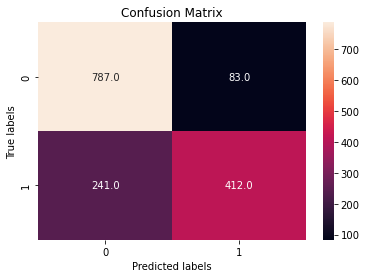

In [218]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [219]:
Sensitivity_recall = recall_score(Y_test,yhat)
Specificity_recall = recall_score(Y_test,yhat, pos_label=0)
print(Sensitivity_recall)
print(Specificity_recall)

0.6309341500765697
0.9045977011494253


model 1 AUC score: 0.7677659256129975


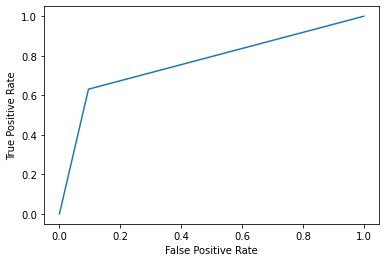

In [220]:
plot_roc_curve(Y_test,yhat)
print(f'model 1 AUC score: {roc_auc_score(Y_test,yhat)}')

In [221]:
print("Logistic Regression Jaccard score: %.4f" %jaccard_score(Y_test,yhat))
print("Logistic Regression Avg F1-score: %.4f" %f1_score(Y_test,yhat,average="weighted"))

Logistic Regression Jaccard score: 0.5598
Logistic Regression Avg F1-score: 0.7815


In [222]:
from sklearn.metrics import recall_score

In [223]:
sensitivity = recall_score(Y_test,yhat)
print(sensitivity)

0.6309341500765697


In [224]:
from sklearn.metrics import confusion_matrix

In [225]:
tn, fp, fn, tp = confusion_matrix(Y_test,yhat).ravel()
specificity = tn / (tn+fp)
print(specificity)

0.9045977011494253


In [226]:
Sensitivity_recall = recall_score(Y_test,yhat)
Specificity_recall = recall_score(Y_test,yhat, pos_label=0)
print(Sensitivity_recall)
print(Specificity_recall)

0.6309341500765697
0.9045977011494253


In [262]:
print(Y_train)

      target
4549       1
4512       0
4368       0
4297       0
13         1
...      ...
3606       1
5704       1
6637       1
2575       0
7336       1

[6090 rows x 1 columns]


In [227]:
#SVM test
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [228]:
svm_cv=GridSearchCV(estimator=svm,param_grid=parameters,n_jobs=-1,cv=10)
svm_cv=svm_cv.fit(X_train,Y_train)

/Users/xiaoqin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xiaoqin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xiaoqin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xiaoqin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [229]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 1.0, 'kernel': 'sigmoid'}
accuracy : 0.7942528735632184


In [230]:
svm_cv.score(X_test,Y_test)

0.7879185817465528

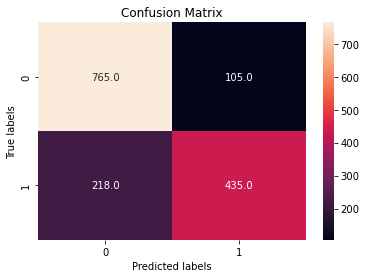

In [231]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [232]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [233]:
Sensitivity_recall = recall_score(Y_test,yhat)
Specificity_recall = recall_score(Y_test,yhat, pos_label=0)
print(Sensitivity_recall)
print(Specificity_recall)

0.666156202143951
0.8793103448275862


In [234]:
def plot_roc_curve(Y_test,yhat):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(Y_test,yhat)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model 1 AUC score: 0.7727332734857685


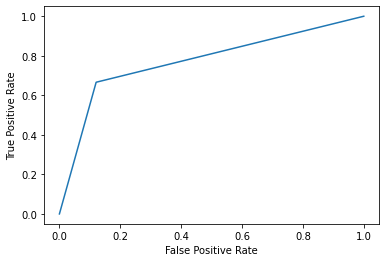

In [235]:
plot_roc_curve(Y_test,yhat)
print(f'model 1 AUC score: {roc_auc_score(Y_test,yhat)}')

In [236]:
from sklearn import metrics

In [237]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [238]:
print("SVM Jaccard score: %.4f" %jaccard_score(Y_test,yhat))
print("SVM Avg F1-score: %.4f" %f1_score(Y_test,yhat,average="weighted"))

SVM Jaccard score: 0.5739
SVM Avg F1-score: 0.7843


In [239]:
#DecisionTree
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [241]:
tree_cv=GridSearchCV(tree,parameters,scoring='accuracy',cv=10)
tree_cv=tree_cv.fit(X_train,Y_train)

In [242]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 16, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.6311986863711001


In [243]:
tree_cv.score(X_test,Y_test)

0.6060407091267236

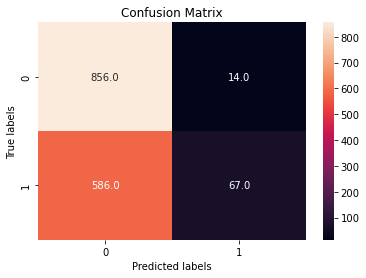

In [244]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [249]:
Sensitivity_recall = recall_score(Y_test,yhat)
Specificity_recall = recall_score(Y_test,yhat, pos_label=0)
print(Sensitivity_recall)
print(Specificity_recall)

0.10260336906584992
0.9839080459770115


model 1 AUC score: 0.5432557075214307


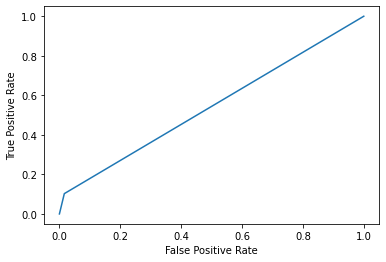

In [250]:
plot_roc_curve(Y_test,yhat)
print(f'model 1 AUC score: {roc_auc_score(Y_test,yhat)}')

In [251]:
print("Decision Tree Jaccard score: %.4f" %jaccard_score(Y_test,yhat))
print("Decision Tree Avg F1-score: %.4f" %f1_score(Y_test,yhat,average="weighted"))

Decision Tree Jaccard score: 0.1004
Decision Tree Avg F1-score: 0.5013


In [248]:
#KNN
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

knn = KNeighborsClassifier()

In [252]:
knn_cv=GridSearchCV(knn,parameters,scoring='accuracy',cv=10)
knn_cv.fit(X_train,Y_train)


/Users/xiaoqin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/xiaoqin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/xiaoqin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/xiaoqin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d ar

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             scoring='accuracy')

In [253]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 2}
accuracy : 0.70935960591133


In [254]:
knn_cv.score(X_test,Y_test)

0.685489166119501

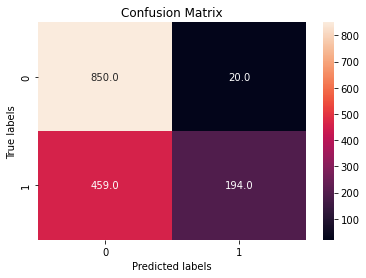

In [255]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [260]:
print(Y_test)

      target
3190       0
6171       0
1196       1
680        1
3358       0
...      ...
3721       0
5825       1
1636       0
4576       1
2513       0

[1523 rows x 1 columns]


In [261]:
print(yhat)

[0 0 0 ... 0 0 0]


In [256]:
Sensitivity_recall = recall_score(Y_test,yhat)
Specificity_recall = recall_score(Y_test,yhat, pos_label=0)
print(Sensitivity_recall)
print(Specificity_recall)

0.29709035222052066
0.9770114942528736


model 1 AUC score: 0.6370509232366971


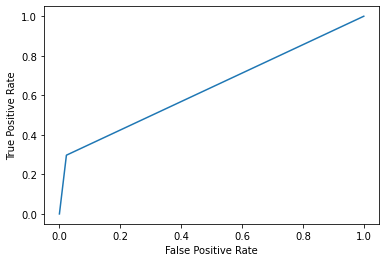

In [257]:
plot_roc_curve(Y_test,yhat)
print(f'model 1 AUC score: {roc_auc_score(Y_test,yhat)}')

In [258]:
print("KNN Jaccard score: %.4f" %jaccard_score(Y_test,yhat))
print("KNN Avg F1-score: %.4f" %f1_score(Y_test,yhat,average="weighted"))

KNN Jaccard score: 0.2883
KNN Avg F1-score: 0.6375


| Algorithm          | Jaccard | F1-score | sensitivity | specificity| AUC.   | accuracy |
|--------------------|---------|----------|-------------|------------|--------|----------|
| KNN                | 0.29    | 0.64     | 0.30        |  0.98      | 0.64   | 0.71     |
| Decision Tree      | 0.10    | 0.50     | 0.10        |  0.98      | 0.54   | 0.63.    |
| SVM                | 0.57    | 0.78     | 0.67        |  0.88      | 0.77   | 0.79.    |
| LogisticRegression | 0.56    | 0.78     | 0.63        |  0.90      | 0.77   | 0.79.    |